<a href="https://colab.research.google.com/github/nizardbsk/pl_pytorch_tutorial/blob/main/7_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1) Design model (input,output size,forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#   - forward pass : compute prediction and loss
#   - backward pass : gradients
#   - update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [12]:
# prepare data
X_numpy,Y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(Y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)
n_samples,n_features = X.shape
print(f'x : {X[:15]}, y : {y[:15]},input : {X.shape}, test : {torch.div(y,X)[:15]}')

x : tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198],
        [ 0.3776],
        [ 0.5129],
        [-0.6712],
        [-1.3965],
        [ 0.3156],
        [-0.6370],
        [-0.3968],
        [-1.1006],
        [ 0.9009],
        [-1.0999]]), y : tensor([[-55.5386],
        [-10.6620],
        [ 22.7574],
        [101.0961],
        [144.3376],
        [ 33.2888],
        [ 33.0153],
        [-25.8870],
        [-99.6391],
        [ 23.8031],
        [-45.5887],
        [ -8.3388],
        [-95.3154],
        [ 36.4073],
        [-87.2926]]),input : torch.Size([100, 1]), test : tensor([[ 90.7855],
        [ 42.7556],
        [ 46.5846],
        [132.6701],
        [ 94.9704],
        [ 88.1674],
        [ 64.3661],
        [ 38.5655],
        [ 71.3494],
        [ 75.4133],
        [ 71.5683],
        [ 21.0175],
        [ 86.6016],
        [ 40.4141],
        [ 79.3648]])


epoch 10, loss 4.414e+03 
epoch 20, loss 3.295e+03 
epoch 30, loss 2.484e+03 
epoch 40, loss 1.897e+03 
epoch 50, loss 1.471e+03 
epoch 60, loss 1.161e+03 
epoch 70, loss 936.0 
epoch 80, loss 772.3 
epoch 90, loss 653.2 
epoch 100, loss 566.5 


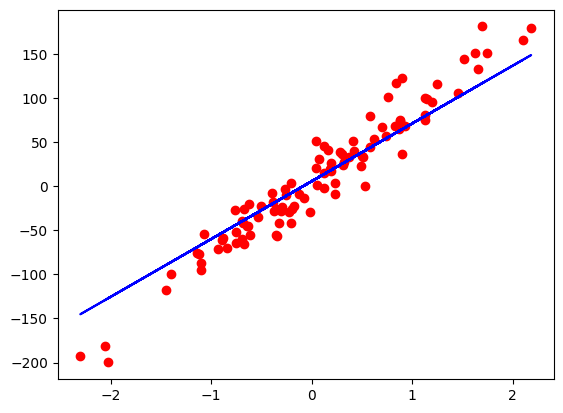

In [7]:
# 1) model
in_size = n_features
out_size = 1
model = nn.Linear(in_size,out_size)

# 2) loss and optimizer
lr_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=lr_rate)

# 3) training loop
n_epochs = 100
for epoch in range(n_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted,y)

  #backward pass
  loss.backward()

  # update
  optimizer.step()
  optimizer.zero_grad()

  if (epoch+1)% 10 == 0:
    print(f'epoch {epoch+1}, loss {loss.item():.4} ')
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy,Y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()